In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

path = "/mnt/c/Users/poselin/Downloads/"

## Benchmark functions: 2D visualization

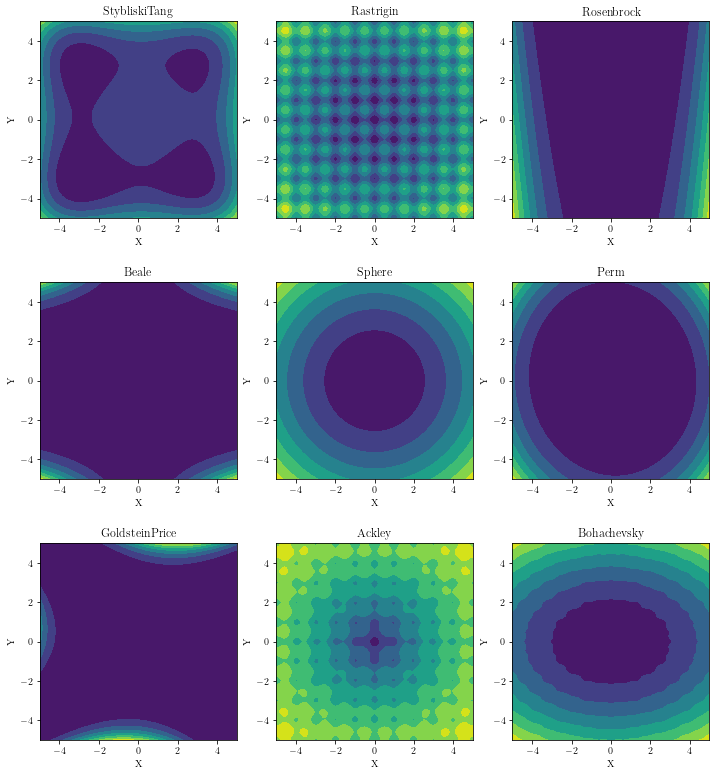

In [17]:
# Define the X1 and X2 span
X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig = plt.figure(figsize=(4*3, 4*7))



for idx, fcn in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20
    Fnorm = Fn(points.T)

    ax = fig.add_subplot(6, 3, idx + 1)
    ax.contourf(X1,X2,Fnorm.reshape(101,101).T, cmap=cm.viridis)
    ax.axis('scaled')  
    ax.set_title(fcn.__name__)  
    ax.set_xlabel(r"X")
    ax.set_ylabel(r"Y")



plt.savefig(path + 'Plot_benchmark_functions2.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

## Benchmark functions: 3D visualization

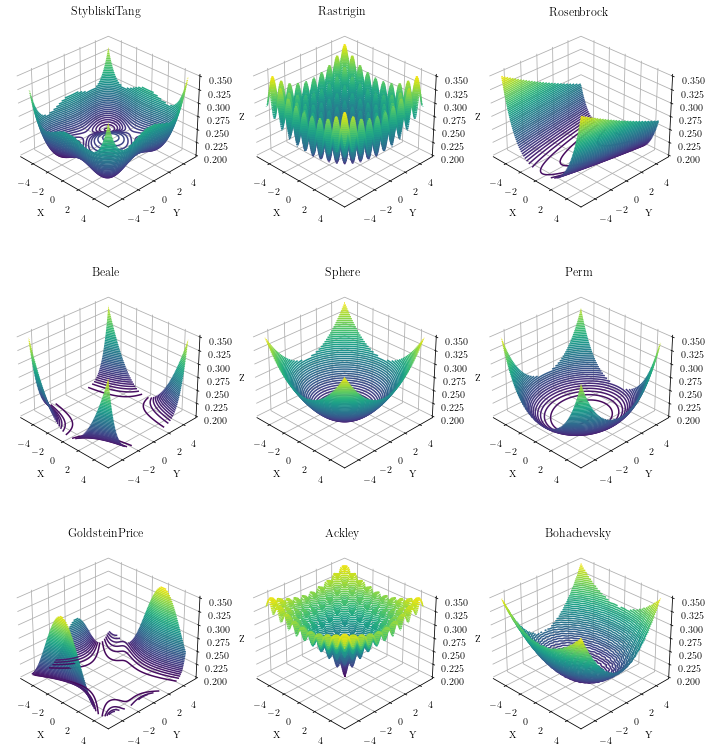

In [22]:
# Define the X1 and X2 span
X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig = plt.figure(figsize=(4*3, 4*7))
#fig.suptitle("Benchmark functions")

for idx, fcn in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20
    Fnorm = Fn(points.T)
    
    ax = fig.add_subplot(6, 3, idx + 1, projection='3d')
    c = ax.contour3D(X1, X2, Fnorm.reshape(101,101).T, 50, cmap=cm.viridis)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(fcn.__name__)  
    ax.view_init(30, -45)
    ax.set_facecolor("white")
    ax.xaxis.set_pane_color("white", alpha=None)
    ax.yaxis.set_pane_color("white", alpha=None)
    ax.zaxis.set_pane_color("white", alpha=None)

plt.savefig(path + 'Plot_benchmark_functions.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

## Benchmark functions: joint graph

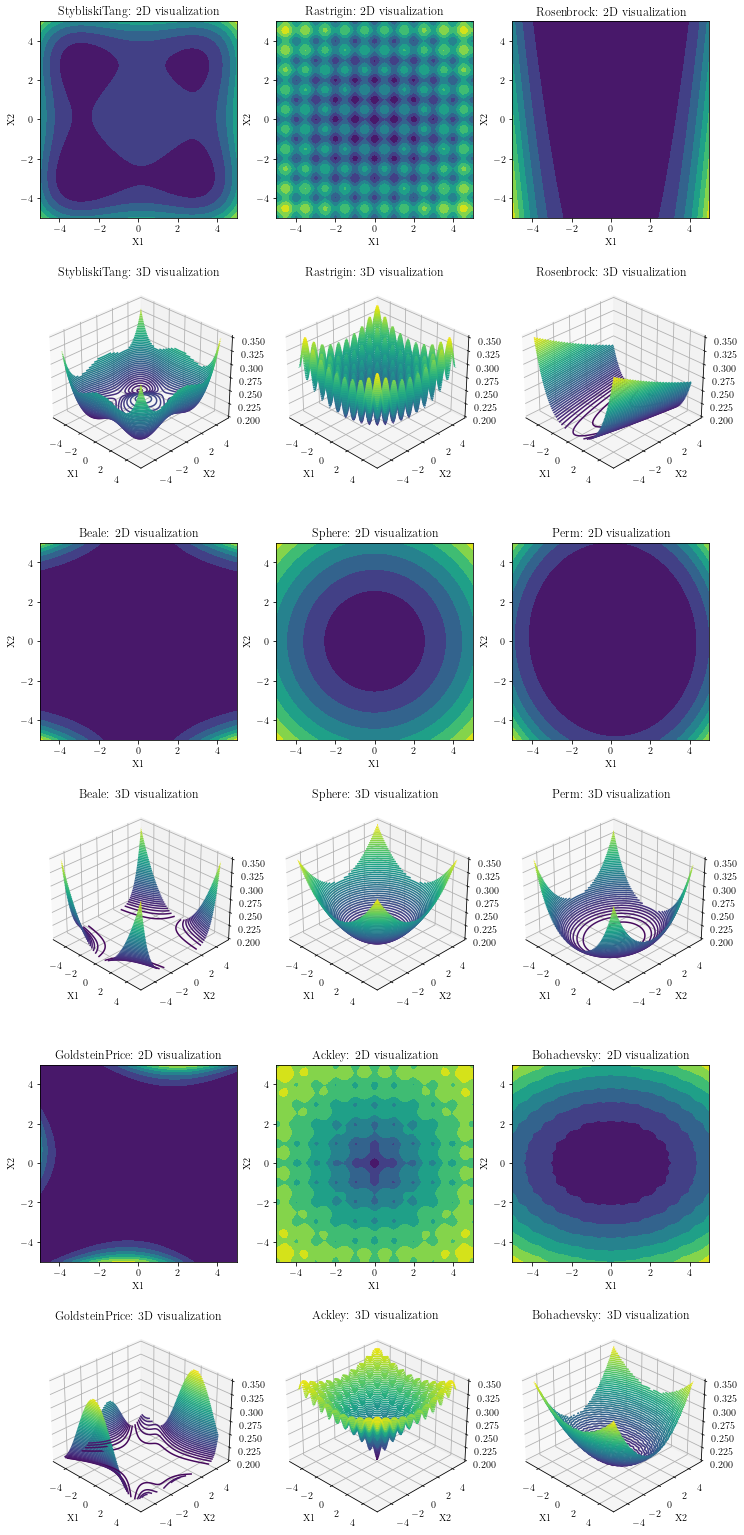

In [20]:
# Define the X1 and X2 span
X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig = plt.figure(figsize=(4*3, 4*7))
#fig.suptitle("Benchmark functions")

idx_plot = 1

for idx, fcn in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20
    Fnorm = Fn(points.T)

    ax = fig.add_subplot(6, 3, idx_plot)
    ax.contourf(X1,X2,Fnorm.reshape(101,101).T, cmap=cm.viridis)
    ax.axis('scaled')  
    ax.set_title(fcn.__name__ + ": 2D visualization")  
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

    ax = fig.add_subplot(6, 3, idx_plot + 3, projection='3d')
    ax.contour3D(X1, X2, Fnorm.reshape(101,101).T, 50, cmap=cm.viridis)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(fcn.__name__ + ": 3D visualization")  
    ax.view_init(30, -45)

    idx_plot += 1
    if (not (idx + 1)%3): idx_plot += 3


plt.savefig(path + 'Plot_benchmark_functions_joint.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

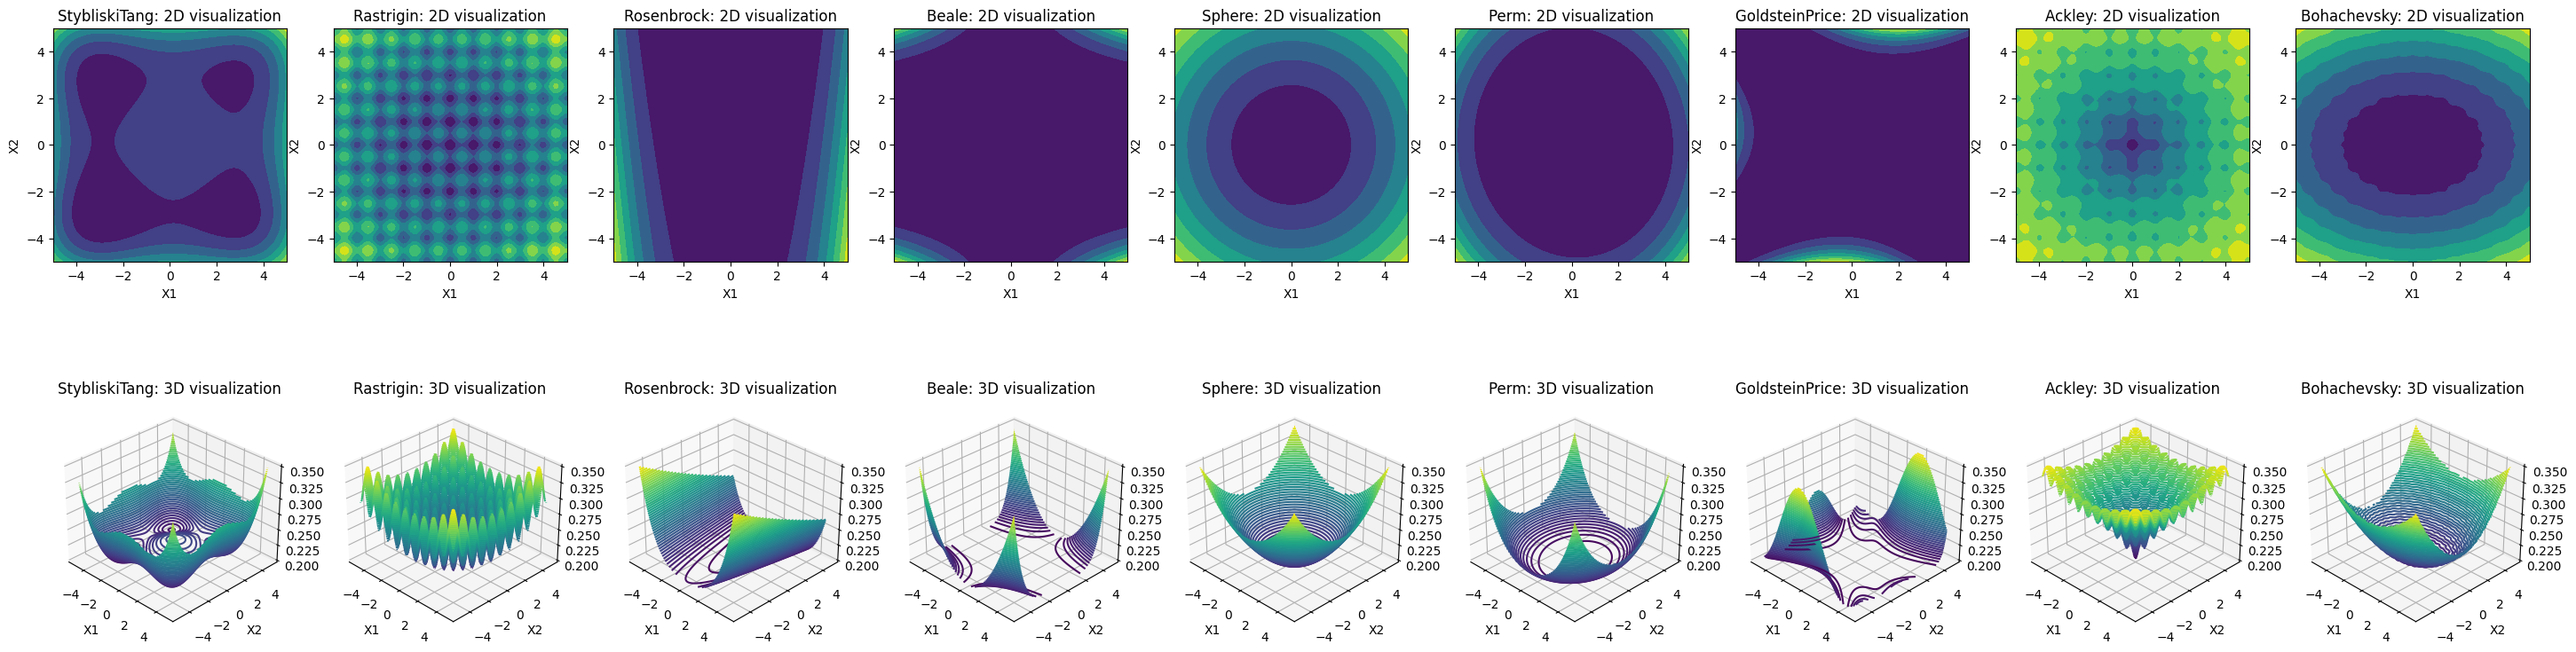

In [20]:
# Define the X1 and X2 span
X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig = plt.figure(figsize=(4*9, 4*2 + 2))
#fig.suptitle("Benchmark functions")

for idx, fcn in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20
    Fnorm = Fn(points.T)
    
    ax = fig.add_subplot(2, 9, idx + 1)
    ax.contourf(X1,X2,Fnorm.reshape(101,101).T, cmap=cm.viridis)
    ax.axis('scaled')  
    ax.set_title(fcn.__name__ + ": 2D visualization")  
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

    ax = fig.add_subplot(2, 9, idx + 1 + 9, projection='3d')
    ax.contour3D(X1, X2, Fnorm.reshape(101,101).T, 50, cmap=cm.viridis)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(fcn.__name__ + ": 3D visualization")  
    ax.view_init(30, -45)


plt.show()